In [279]:
import torch
import torchview
import torchvision as tv

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.manifold import TSNE

import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
olivetti = fetch_olivetti_faces()

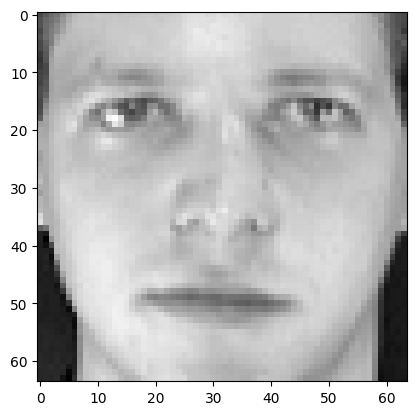

In [3]:
plt.imshow(olivetti.data[0].reshape((64, 64)), cmap="gray")
plt.show()

In [7]:
np.unique(olivetti.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

<Axes: ylabel='Count'>

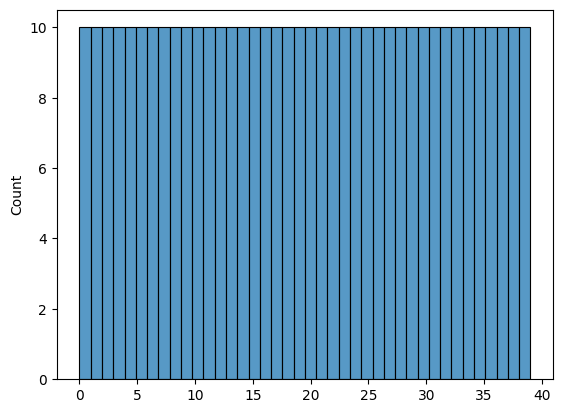

In [5]:
sns.histplot(olivetti.target, bins=40)

In [8]:
n_features = 7
pca = PCA(n_components=n_features)
pca_data = pca.fit_transform(olivetti.data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, olivetti.target, test_size=0.2)
X_train.shape, X_test.shape

((320, 7), (80, 7))

interval columns not set, guessing: [0, 1, 2, 3, 4, 5, 6, 7]


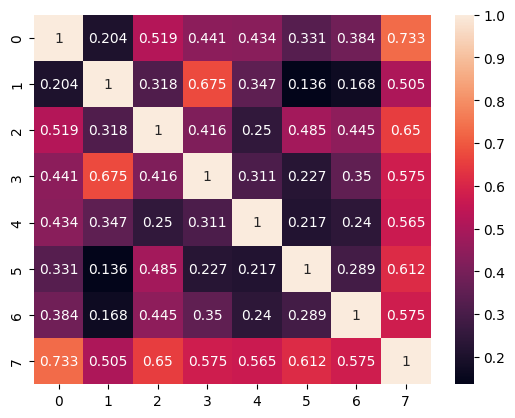

In [10]:
import phik
import pandas as pd

phik_corr = pd.DataFrame(np.column_stack((pca_data, olivetti.target))).phik_matrix().round(3)
sns.heatmap(phik_corr, annot=True, fmt=".3g")
plt.show()

In [11]:
search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions={
        "n_estimators": [i for i in range(100, 501, 10)],
        "max_depth": [i for i in range(1, 6)],
        "min_samples_split": [1, 2, 3, 4, 5],
        "min_samples_leaf": [1, 2, 3, 4, 5]
    },
    cv=5,
    random_state=42
)
search.fit(X_train, y_train)
search.best_params_

/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/zorinep/big_data

{'n_estimators': 490,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 5}

# RandomForestClassifier + PCA

In [13]:
model = RandomForestClassifier(**search.best_params_, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         4
           6       0.67      1.00      0.80         2
           7       0.33      1.00      0.50         1
           8       1.00      0.50      0.67         4
           9       0.75      1.00      0.86         3
          10       0.50      1.00      0.67         2
          11       0.67      0.67      0.67         3
          12       0.00      0.00      0.00         2
          13       0.50      0.50      0.50         2
          15       0.50      1.00      0.67         1
          16       1.00      0.33      0.50         3
          17       1.00      1.00      1.00         3
          18       0.50    

/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

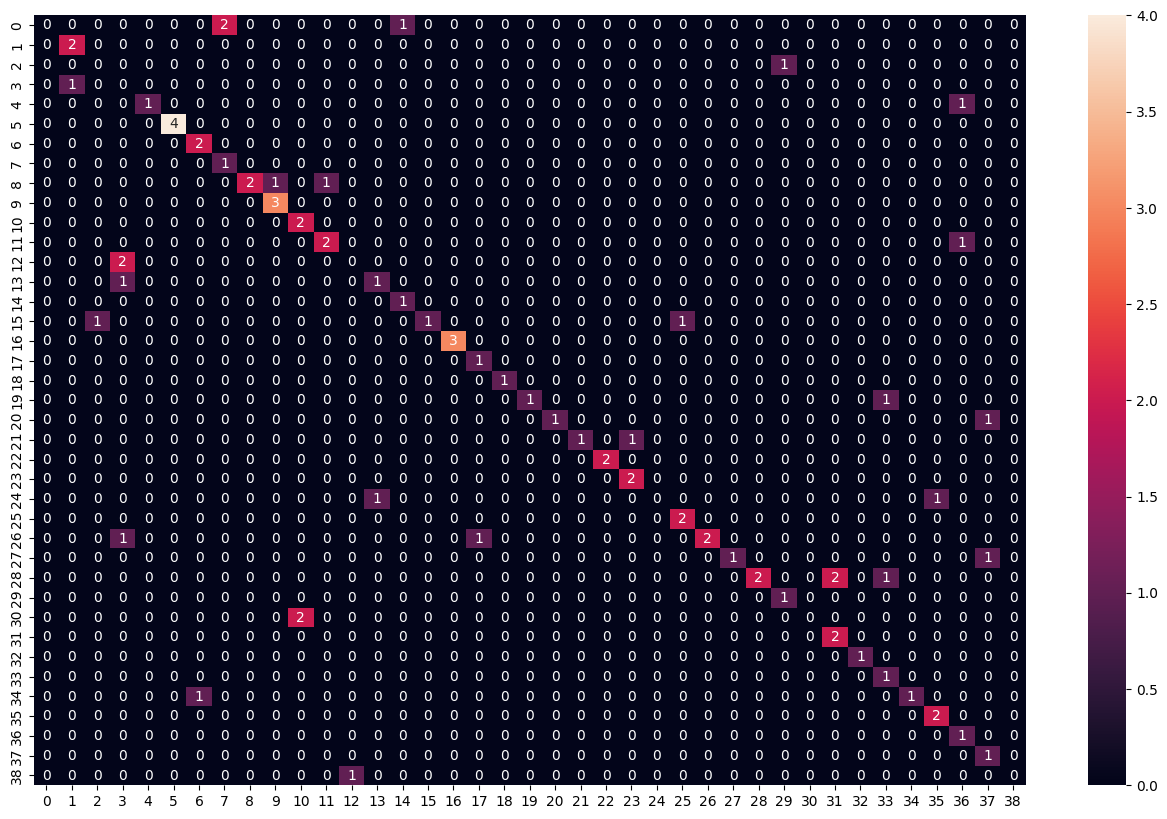

In [14]:
errors = confusion_matrix(y_pred=y_pred, y_true=y_test)
plt.figure(figsize=(16, 10))
sns.heatmap(errors, annot=True, fmt=".3g")
plt.show()

# RandomForestClassifier + TSNE

In [30]:
tsne = TSNE(n_components=7, method="exact", random_state=42)
tsne_data = tsne.fit_transform(olivetti.data)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, olivetti.target, test_size=0.3)
X_train.shape, X_test.shape

((280, 7), (120, 7))

In [31]:
model = RandomForestClassifier(**search.best_params_, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         5
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         3
           4       0.50      1.00      0.67         2
           5       0.75      1.00      0.86         3
           6       0.25      0.33      0.29         3
           7       1.00      0.67      0.80         3
           8       0.50      1.00      0.67         2
           9       0.00      0.00      0.00         0
          10       0.75      1.00      0.86         3
          11       0.50      1.00      0.67         2
          12       0.00      0.00      0.00         4
          13       0.75      0.75      0.75         4
          14       0.33      1.00      0.50         2
          15       1.00      0.33      0.50         3
          16       0.50      0.67      0.57         3
          17       0.50    

/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

# PCA + FullyConnectedNetwork

In [32]:
pca = PCA(n_components=7, random_state=42)
pca_data = pca.fit_transform(olivetti.data)

In [282]:
features = torch.FloatTensor(pca_data)
labels = torch.LongTensor(olivetti.target)

dataset = torch.utils.data.TensorDataset(features, labels)

In [47]:
dataset[0][0].shape

torch.Size([7])

In [ ]:
def calc_accuracy(y_pred, y_true):
    return sum(y_true.numpy() == np.array([torch.argmax(i).item() for i in y_pred])) / len(np.array([torch.argmax(i).item() for i in y_pred]))

np.float64(0.5)

In [240]:
def train_model(model, optimizer, loss_fn, dataset, batch_size, epoches=500):
    train_ds, test_ds = torch.utils.data.random_split(dataset=dataset, lengths=[0.8, 0.2])
    train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False)
    
    train_loss = []
    train_accuracy = []
    test_accuracy = []

    max_train_acc = -float("inf")

    for e in range(epoches):
        train_progress = tqdm(train_loader)
        model.train()

        running_train_loss = []
        running_train_accuracy = []
        for x, y in train_progress:
            optimizer.zero_grad()

            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            acc = float(calc_accuracy(y_pred=y_pred, y_true=y))
            loss.backward()

            optimizer.step()

            running_train_loss.append(loss.item())
            running_train_accuracy.append(acc)

            train_progress.set_description(f"TRAIN [{e+1}/{epoches}] accuracy={acc:.3f} loss={loss.item():.3f}")
        train_loss.append(np.mean(running_train_loss))
        train_accuracy.append(np.mean(running_train_accuracy))

        with torch.no_grad():
            model.eval()

            test_progress = tqdm(test_loader)
            running_test_accuracy = []
            for x, y in test_progress:
                y_pred = model(x)
                acc = float(calc_accuracy(y_pred=y_pred, y_true=y))
                running_test_accuracy.append(acc)

                test_progress.set_description(f"TEST  [{e+1}/{epoches}] accuracy={acc:.3f}")

                if acc > max_train_acc:
                    max_train_acc = acc
                    torch.save(model.state_dict(), "best.pt")

            test_accuracy.append(np.mean(running_test_accuracy))
    return train_loss, train_accuracy, test_accuracy

In [283]:
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=7, out_features=20),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20, out_features=35),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=35, out_features=64),
    torch.nn.Dropout(p=0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=40),
    torch.nn.Dropout(p=0.5),
    torch.nn.Softmax()
)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [284]:
features = torch.FloatTensor(pca_data)
labels = torch.LongTensor(olivetti.target)

dataset = torch.utils.data.TensorDataset(features, labels)

  0%|          | 0/5 [00:00<?, ?it/s]/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
TEST  [450/450] accuracy=0.750: 100%|██████████| 2/2 [00:00<00:00, 183.46it/s]


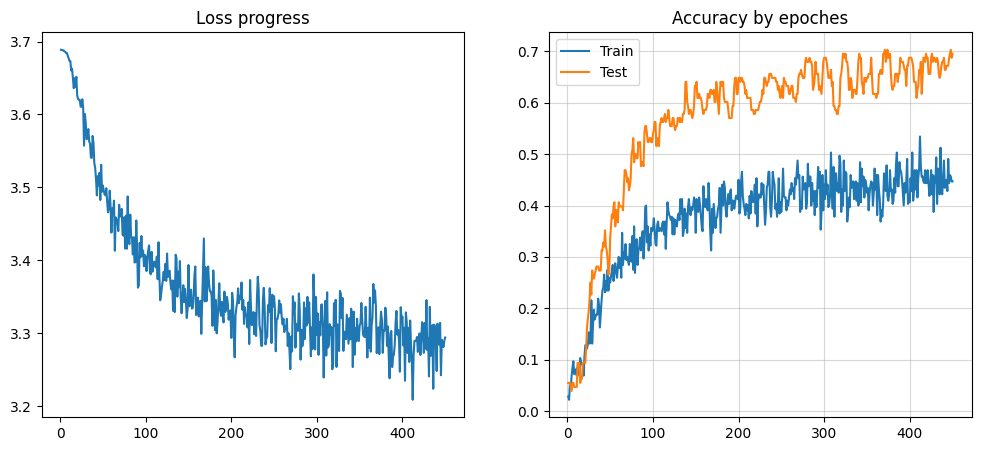

In [285]:
train_loss, train_accuracy, test_accuracy = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    dataset=dataset,
    batch_size=64,
    epoches=450
)
fix, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot([i for i in range(1, len(train_loss)+1)], train_loss)
ax[0].set_title("Loss progress")
ax[1].plot([i for i in range(1, len(train_accuracy)+1)], train_accuracy, label="Train")
ax[1].plot([i for i in range(1, len(test_accuracy)+1)], test_accuracy, label="Test")
ax[1].set_title("Accuracy by epoches")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

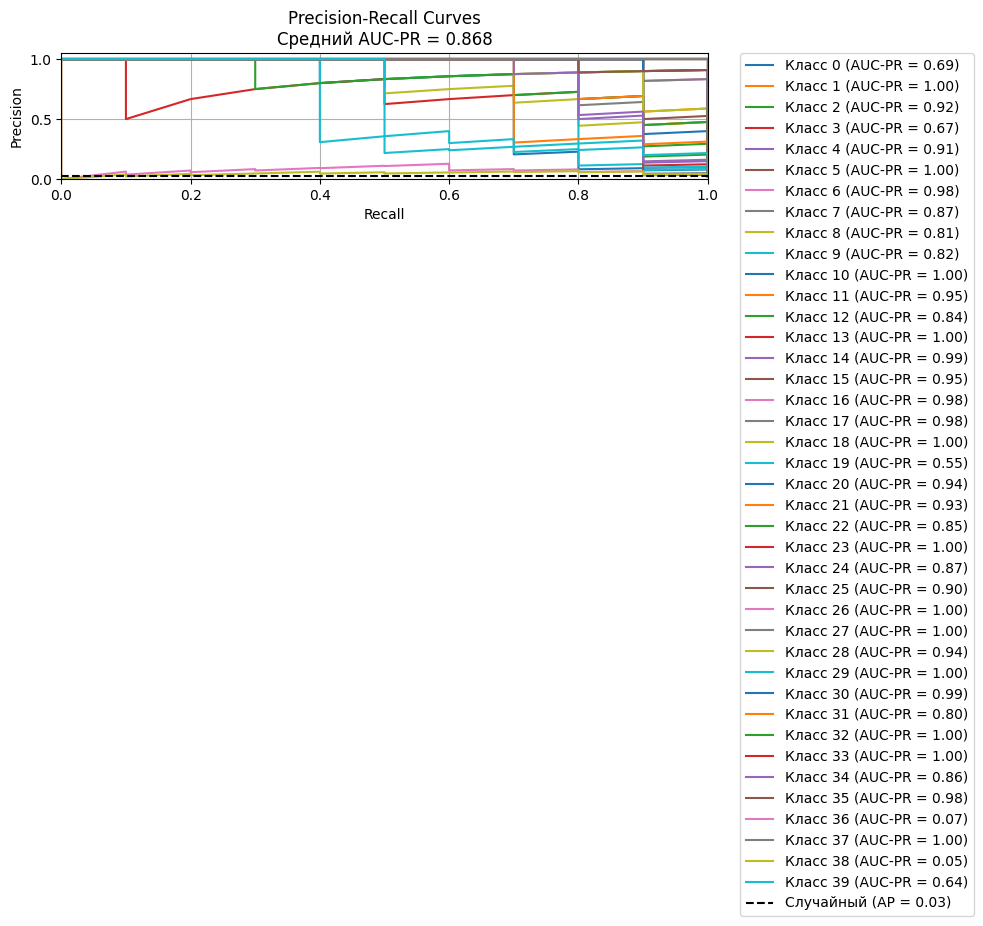

Средний AUC-PR: 0.8679


In [ ]:
probas = torch.softmax(y_pred, dim=1).numpy() # type: ignore
y_true = dataset.tensors[1].numpy()
plt.figure(figsize=(10, 6)) 

n_classes = probas.shape[1]
mean_auc_pr = 0

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true == i, probas[:, i])
    auc_pr = auc(recall, precision)
    mean_auc_pr += auc_pr
    plt.plot(recall, precision, label=f'Класс {i} (AUC-PR = {auc_pr:.2f})')

mean_auc_pr /= n_classes

if n_classes == 2:
    positive_ratio = np.mean(y_true == 1)
    plt.axhline(y=positive_ratio, color='k', linestyle='--', label=f'Случайный (AP = {positive_ratio:.2f})')
else:
    plt.axhline(y=1/n_classes, color='k', linestyle='--', label=f'Случайный (AP = {1/n_classes:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nСредний AUC-PR = {mean_auc_pr:.3f}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout() 
plt.show()

print(f"Средний AUC-PR: {mean_auc_pr:.4f}")

In [274]:
model.load_state_dict(torch.load("./best.pt"))
with torch.no_grad():
    model.eval()
    y_pred = model(dataset.tensors[0])
    accuracy = calc_accuracy(y_pred, dataset.tensors[1])
    print(f"{accuracy=}")

accuracy=np.float64(0.825)


/home/zorinep/big_data_magistracy/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [258]:
probas = torch.softmax(y_pred, dim=1).numpy()
y_true = dataset.tensors[1].numpy()
score = roc_auc_score(y_true=y_true, y_score=probas, multi_class="ovr")
score

0.9752628205128205

# TSNE + FullyConnectedNetwork

In [260]:
tsne = TSNE(n_components=7, method="exact", random_state=42)
tsne_data = tsne.fit_transform(olivetti.data)
features = torch.FloatTensor(tsne_data)
labels = torch.LongTensor(olivetti.target)

dataset = torch.utils.data.TensorDataset(features, labels)

In [271]:
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=7, out_features=20),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20, out_features=35),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=35, out_features=64),
    torch.nn.Dropout(p=0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=40),
    torch.nn.Dropout(p=0.5),
    torch.nn.Softmax()
)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

TEST  [500/500] accuracy=0.750: 100%|██████████| 2/2 [00:00<00:00, 170.65it/s]


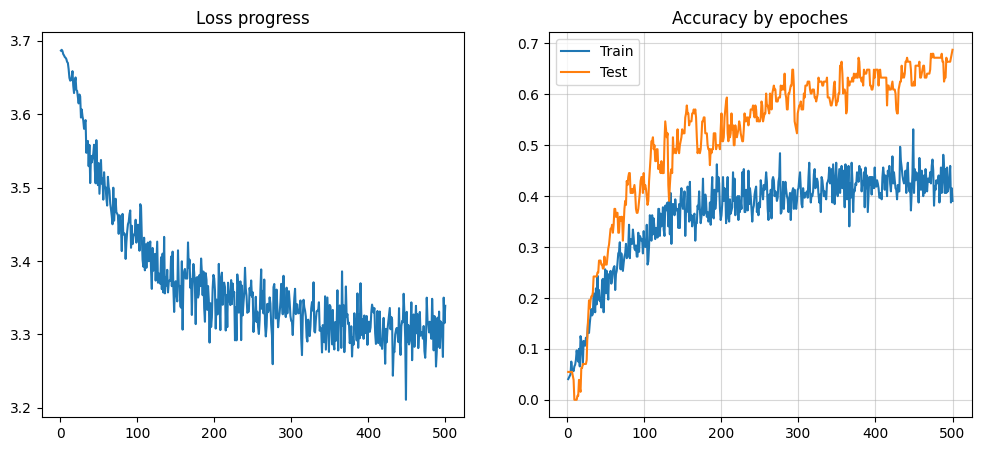

In [272]:
train_loss, train_accuracy, test_accuracy = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    dataset=dataset,
    batch_size=64,
    epoches=500
)
fix, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot([i for i in range(1, len(train_loss)+1)], train_loss)
ax[0].set_title("Loss progress")
ax[1].plot([i for i in range(1, len(train_accuracy)+1)], train_accuracy, label="Train")
ax[1].plot([i for i in range(1, len(test_accuracy)+1)], test_accuracy, label="Test")
ax[1].set_title("Accuracy by epoches")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [275]:
model.load_state_dict(torch.load("./best.pt"))
with torch.no_grad():
    model.eval()
    y_pred = model(dataset.tensors[0])
    accuracy = calc_accuracy(y_pred, dataset.tensors[1])
    print(f"{accuracy=}")

accuracy=np.float64(0.825)


In [276]:
probas = torch.softmax(y_pred, dim=1).numpy()
y_true = dataset.tensors[1].numpy()
score = roc_auc_score(y_true=y_true, y_score=probas, multi_class="ovr")
score

0.9783717948717949

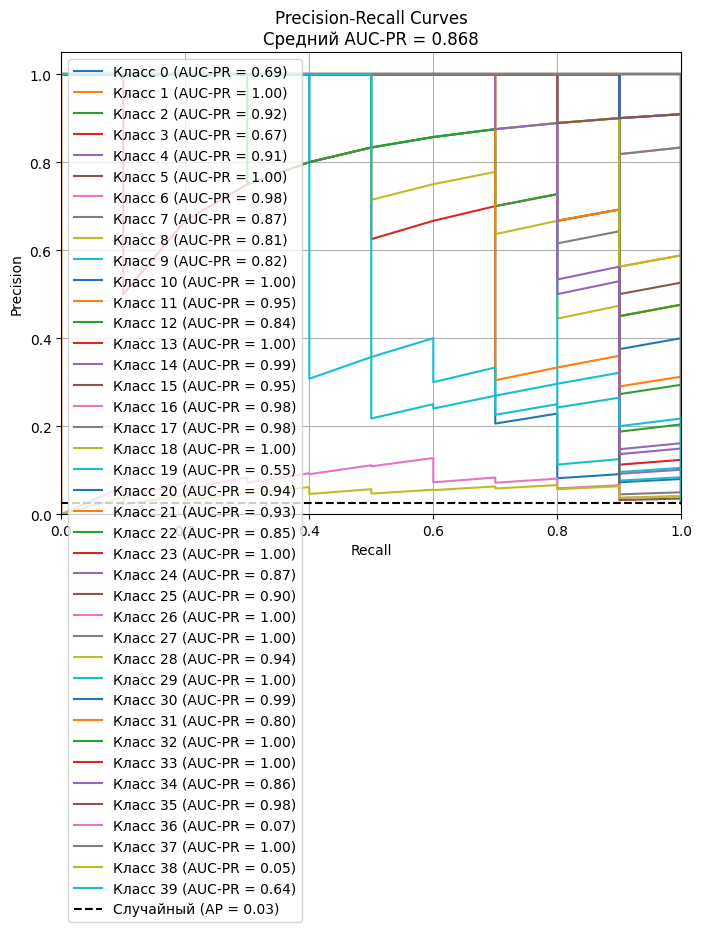

Средний AUC-PR: 0.8679


In [ ]:
probas = torch.softmax(y_pred, dim=1).numpy()
y_true = dataset.tensors[1].numpy()
plt.figure(figsize=(8, 6))

n_classes = probas.shape[1]
mean_auc_pr = 0

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true == i, probas[:, i])
    auc_pr = auc(recall, precision)
    mean_auc_pr += auc_pr
    plt.plot(recall, precision, label=f'Класс {i} (AUC-PR = {auc_pr:.2f})')

mean_auc_pr /= n_classes

if n_classes == 2:
    positive_ratio = np.mean(y_true == 1)
    plt.axhline(y=positive_ratio, color='k', linestyle='--', label=f'Случайный (AP = {positive_ratio:.2f})')
else:
    plt.axhline(y=1/n_classes, color='k', linestyle='--', label=f'Случайный (AP = {1/n_classes:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nСредний AUC-PR = {mean_auc_pr:.3f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Средний AUC-PR: {mean_auc_pr:.4f}")